In [81]:
using LowLevelFEM
import LowLevelFEM as FEM

gmsh.initialize()

In [82]:
using SparseArrays, LinearAlgebra

In [83]:
gmsh.open("body2.geo")

Info    : Reading 'body2.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.000935977s, CPU 0.000937s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 20%] Meshing surface 2 (Transfinite)
Info    : [ 40%] Meshing surface 3 (Transfinite)
Info    : [ 60%] Meshing surface 4 (Transfinite)
Info    : [ 70%] Meshing surface 5 (Transfinite)
Info    : [ 90%] Meshing surface 6 (Transfinite)
Info    : Done meshing 2D (Wall 0.000407977s, CPU 0.000386s)
Info    : Meshing 3D

In [84]:
hooke = FEM.material("body", E=260, ν=0.3)
nonlin = FEM.material("body", E=260, ν=0.3, type=:StVenantKirchhoff)
nonlin = FEM.material("body", E=260, ν=0.3, type=:NeoHookeCompressible)
linelast = FEM.Problem([hooke])
nonlinelast = FEM.Problem([nonlin])

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 61)
Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 61)


LowLevelFEM.Problem("body2", :Solid, 3, 3, LowLevelFEM.Material[LowLevelFEM.Material("body", :NeoHookeCompressible, 260.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 150.0, 100.0, 216.66666666666666)], 1.0, 525)

In [85]:
left = FEM.displacementConstraint("left", ux=0, uy=0, uz=0)
right = FEM.displacementConstraint("right", ux=0)

("right", 0, 0 + 1im, 0 + 1im)

In [86]:
fy(x, y, z) = (-z + 0.5) * 10
fz(x, y, z) = (y - 0.5) * 10
load = FEM.load("right", fy=fy, fz=fz)

("right", 0, Main.fy, Main.fz)

In [87]:
q = FEM.solveDisplacement(linelast, [load], [left, right])
A1 = FEM.solveStrain(linelast, q)
F1 = FEM.solveStress(linelast, q)

LowLevelFEM.TensorField([[3.3958922927750415e-12; 2.692254832004152; … ; -0.23113781143210485; -0.9687202121567281;;], [2.27648802586522e-12; 1.0843452597353211; … ; 0.06397603450798428; -0.07620512119106138;;], [2.1924614901358552e-12; 1.1089682991113057; … ; -0.010785097652005193; 0.05333753161117462;;], [1.5668239275457019e-12; 1.1533473241406398; … ; 0.0011585449316564578; -0.012727946604050317;;], [3.680499264732684e-12; 1.1404263539153137; … ; -4.001999833191938e-5; 0.002004803437035546;;], [-5.70115791598616e-12; 1.1426354045103198; … ; -1.1090769697075231e-5; -0.00021094436312594708;;], [-4.2245643791451355e-11; 1.1424020391296446; … ; 1.3382276231599377e-6; 1.0950889176887524e-5;;], [-1.1462094930656007e-10; 1.1424072543165158; … ; 5.58645074644204e-7; -6.929103558289684e-8;;], [-4.910253030707036e-10; 1.142410570685437; … ; -2.9534225065575015e-7; 4.1891786931730346e-7;;], [6.769266848591261e-9; 1.1424100265258974; … ; 2.563147472045557e-8; -7.525818206469137e-8;;]  …  [-6.31

In [88]:
u1 = FEM.showDoFResults(linelast, q, :uvec)

14

In [89]:
FEM.showElementResults(linelast, A1, :ex)
FEM.showElementResults(linelast, A1, :ey)
FEM.showElementResults(linelast, A1, :ez)
FEM.showElementResults(linelast, A1, :exy)
FEM.showElementResults(linelast, A1, :eyz)
FEM.showElementResults(linelast, A1, :ezx)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


20

In [90]:
r, e = FEM.solveDeformation(nonlinelast, [load], [left, right],
    followerLoad=true,
    loadSteps=50,
    rampedLoad=true,
    rampedSupport=false,
    maxIteration=10,
    saveSteps=true,
    saveIterations=false,
    plotConvergence=true,
    relativeError=1e-3
)

(LowLevelFEM.VectorField(Matrix{Float64}[], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.7499999999999999 0.7290692318177784 … 0.41900334587553173 0.4167730745835165; 0.75 0.7693152033925944 … 0.8436174136915999 0.8430744725105429], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0], Int64[], 51, :u3D), Any[0.00453908778045529, 0.0006115453729407558, 0.0009368605694813029, 0.0031926780324305266, 0.00025652054508748057, 0.002539657171016193, 0.0005857808340096339, 0.0031969662559981358, 0.0007060153086450901, 0.0032440032752175016  …  0.0012266752040584086, 0.0007078471777417202, 0.0012645437524237868, 0.0007664549350609921, 0.0013101319983766424, 0.0008322307308232322, 0.001363834007102898, 0.0009055473708859376, 0.0014259379908432204, 0.0009866664775125095])

In [91]:
r1 = FEM.showDeformationResults(nonlinelast, r, :uvec)

21

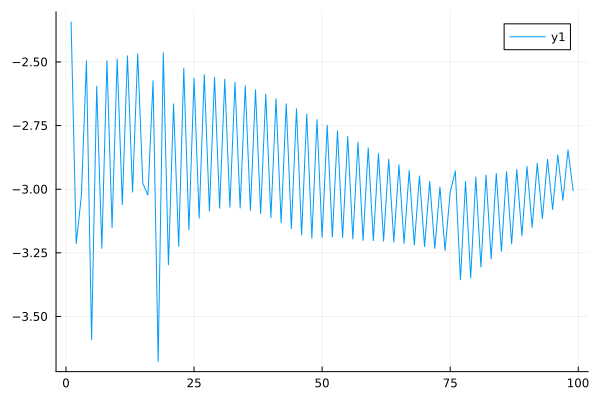

In [92]:
using Plots
plot(log10.(e))

In [93]:
FEM.probe(r, 5, 0.3, 0.3, step=r.nsteps)

3-element Vector{Float64}:
 5.000845126465302
 0.43135187211600584
 0.22555056381261565

In [94]:
FEM.probe(r, "A", step=r.nsteps)

3-element Vector{Float64}:
 9.001507061158605
 0.42126691443388564
 0.9170046295284803

In [95]:
D = FEM.deformationGradient(linelast, q)

LowLevelFEM.TensorField([[9.70254940792869e-15; 0.02692254832004152; … ; -0.05436463868986549; 0.0001652368964625492;;], [1.0690013110306628e-14; 0.02882311004533857; … ; -0.11127069701091191; -0.00010712709944750431;;], [8.964399402648737e-15; 0.028520215766313507; … ; -0.16858981002151896; 3.6899980028565205e-5;;], [8.342595038399949e-15; 0.028566940828273726; … ; -0.2256538836424923; -9.528280647014276e-6;;], [9.33576670734621e-15; 0.028558857433678878; … ; -0.28278533660639704; 2.0905990623099058e-6;;], [3.718782368354725e-15; 0.028560592558201564; … ; -0.33990422025694633; -4.2360972818400455e-7;;], [-1.9607012245603923e-13; 0.028560163684330037; … ; -0.3970249090521003; 8.569454218454453e-8;;], [-1.7190839917091555e-13; 0.02856027158288907; … ; -0.4541453894899274; -1.8382969202423993e-8;;], [-2.7542770425894086e-12; 0.02856024545710964; … ; -0.5112658940557641; 4.098327899271226e-9;;], [2.3098851502573697e-11; 0.02856025133471296; … ; -0.568386393770944; -3.3559099943403226e-10;

In [96]:
A2 = (D + D') / 2

LowLevelFEM.TensorField([[9.70254940792869e-15; 0.01346127416002076; … ; -0.0011556890571605173; 0.0001652368964625492;;], [1.0690013110306628e-14; 0.005421726298676606; … ; 0.0003198801725399214; -0.00010712709944750431;;], [8.964399402648737e-15; 0.005544841495556533; … ; -5.392548826002597e-5; 3.6899980028565205e-5;;], [8.342595038399949e-15; 0.005766736620703202; … ; 5.792724658268411e-6; -9.528280647014276e-6;;], [9.33576670734621e-15; 0.005702131769576579; … ; -2.000999916595969e-7; 2.0905990623099058e-6;;], [3.718782368354725e-15; 0.005713177022551606; … ; -5.5453848485376156e-8; -4.2360972818400455e-7;;], [-1.9607012245603923e-13; 0.00571201019564822; … ; 6.691138088044113e-9; 8.569454218454453e-8;;], [-1.7190839917091555e-13; 0.005712036271582569; … ; 2.7932253454654443e-9; -1.8382969202423993e-8;;], [-2.7542770425894086e-12; 0.005712052853427187; … ; -1.4767111977675995e-9; 4.098327899271226e-9;;], [2.3098851502573697e-11; 0.005712050132629489; … ; 1.281574291134291e-10; -3.3

In [97]:
FEM.probe(q, 9, 0.8, 0.8)

3-element Vector{Float64}:
  4.626985915021476e-6
 -0.30758922283217965
  0.3075948783923025

In [98]:
FEM.probe(A1, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  1.21151e-5  -0.00864136   0.00862699
 -0.00864136   3.99926e-5  -8.40705e-6
  0.00862699  -8.40705e-6  -5.24081e-5

In [99]:
FEM.probe(A2, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  1.21151e-5  -0.00864136   0.00862699
 -0.00864136   3.99926e-5  -8.40705e-6
  0.00862699  -8.40705e-6  -5.24081e-5

In [100]:
A11 = FEM.elementsToNodes(linelast, A1)
A22 = FEM.elementsToNodes(linelast, A2)

LowLevelFEM.TensorField(Matrix{Float64}[], [3.375520215807991e-14; -0.0265158985280076; … ; 1.1750177934144457e-5; 0.0002133518923821226;;], [0.0], Int64[], 1, :e)

In [101]:
FEM.probe(A11, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  1.02288e-5  -0.0127044     0.0127071
 -0.0127044    0.000103211   1.52781e-7
  0.0127071    1.52781e-7   -0.000110959

In [102]:
FEM.probe(A22, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  1.02288e-5  -0.0127044     0.0127071
 -0.0127044    0.000103211   1.52781e-7
  0.0127071    1.52781e-7   -0.000110959

In [103]:
Ex = linelast.material[1].E
ν = linelast.material[1].ν
I = unitTensor(A2)
F2 = Ex / (1 + ν) * (A2 + ν / (1 - 2ν) * I * trace(A2))

LowLevelFEM.TensorField([[-0.017689804409948093; 2.692254832004152; … ; -0.23113781143210346; -0.7346631034492068;;], [-0.017689804409750598; 1.0843452597353211; … ; 0.06397603450798428; -0.7891359026312175;;], [-0.01768980441009572; 1.1089682991113066; … ; -0.010785097652005193; -0.7603304867360037;;], [-0.017689804410220084; 1.1533473241406405; … ; 0.0011585449316536822; -0.7696161388711196;;], [-0.017689804410021447; 1.1404263539153157; … ; -4.001999833191938e-5; -0.7672923629292547;;], [-0.017689804411144844; 1.1426354045103213; … ; -1.1090769697075231e-5; -0.7677952046873535;;], [-0.017689804451102624; 1.1424020391296439; … ; 1.3382276176088226e-6; -0.7676933438332798;;], [-0.01768980444627028; 1.1424072543165138; … ; 5.586450690930889e-7; -0.7677141593355572;;], [-0.01768980496274401; 1.1424105706854375; … ; -2.953422395535199e-7; -0.7677096630761369;;], [-0.0176897997921183; 1.1424100265258978; … ; 2.5631485822685818e-8; -0.7677105498599166;;]  …  [-0.017689792373251148; -3.9984

In [104]:
FEM.probe(F1, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.00237795  -1.72827      1.7254
 -1.72827      0.00795344  -0.00168141
  1.7254      -0.00168141  -0.0105267

In [105]:
FEM.probe(F2, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.000509195  -1.72827      1.7254
 -1.72827       0.00506629  -0.00168141
  1.7254       -0.00168141  -0.0134138

In [106]:
FEM.showElementResults(linelast, A2, :ex)
FEM.showElementResults(linelast, A2, :ey)
FEM.showElementResults(linelast, A2, :ez)
FEM.showElementResults(linelast, A2, :exy)
FEM.showElementResults(linelast, A2, :eyz)
FEM.showElementResults(linelast, A2, :ezx)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


27

In [107]:
FEM.openPostProcessor()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


In [108]:
gmsh.finalize()